In [234]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt, haversine, math

Classes

In [235]:
class City:
    def __init__(self, x, y, Name):
        self.x = x
        self.y = y
        self.name = Name
    
    def distance(self, city):
        # xDis = abs(self.x - city.x)
        # yDis = abs(self.y - city.y)
        # distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        fromCity = (self.x, self.y)
        toCity = (city.x, city.y)
        distance = haversine.haversine(fromCity, toCity)
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


In [236]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
                
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness


Functions

### population

In [237]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [238]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

### routes

In [239]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)


In [240]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [241]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

## CHILD

In [242]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child


In [243]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children


In [244]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [245]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

### Genetic Algorithm

In [260]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: %.2f KM" %(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: %.2f KM " %(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute


In [247]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

Run Code

In [248]:
cityList = []

cityList.append(City(35.6761682232498, 139.65034365137095, "Tokyo")) #Tokyo
cityList.append(City(43.17375155501808, 141.38640423363793, "Sapporo")) #Sapporo
cityList.append(City(32.731672517287365, 129.88290344893076,"Nagasaki" )) #Nagasaki
cityList.append(City(35.234336587353866, 139.02014399229557,"Hakone")) #Hakone
cityList.append(City(35.00676564513197, 138.38524938948356,"Shizuoka")) #Shizuoka
cityList.append(City(35.22133096301226, 136.9006389352204,"Nagoya"))#Nagoya
cityList.append(City(35.065281810898774, 135.7825971974962,"Kyoto")) #Kyoto
cityList.append(City(34.49696157627642, 132.44415808986204,"Hiroshima")) #Hiroshima
cityList.append(City(36.628742641108836, 136.60262431552695,"Kanazawa")) #Kanazawa
cityList.append(City(37.80784191567834, 140.48048187247403,"Fukushima")) #Fukushima
cityList.append(City(34.088100765961954, 134.61056457310585,"Tokushima")) #Tokushima
cityList.append(City(38.33038354768187, 140.8990567443994,"Sendai"))#Sendai
cityList.append(City(40.92827041575595, 140.71978296111592,"Aomori"))#Aomori
cityList.append(City(35.486283012019484, 133.88137828865754,"Totori")) #Totori
cityList.append(City(33.720934381634166, 130.36595964990005,"Fukuoka")) #Fukuoka
cityList.append(City(35.6761682232498, 139.65034365137095,"Tokyo")) #Tokyo


# for i in range(0,25):
#     cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [261]:
population = geneticAlgorithm(population=cityList, popSize=100, eliteSize=10, mutationRate=0.01, generations=100)

Initial distance: 6012.95 KM
Final distance: 3575.11 KM 


### PLOT

In [250]:

def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    fig= plt.figure()
    ax = fig.add_subplot()
    plt.plot(progress)
    
    ax.set_xlabel('Distance')
    ax.set_ylabel('Generation')

    ax.xaxis.label.set_color('white')        
    ax.yaxis.label.set_color('white')    

    fig.set_figheight(6)
    fig.set_figwidth(8)
    ax.tick_params(axis='x', colors='white') 
    ax.tick_params(axis='y', colors='white') 
    plt.show()



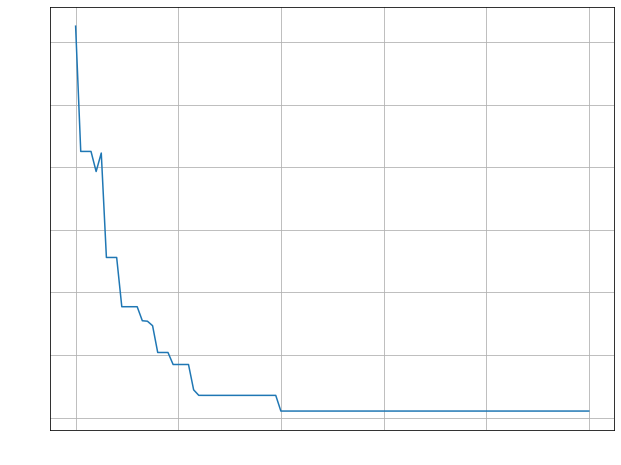

In [251]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=10, mutationRate=0.01, generations=100)

In [252]:
population

[(37.80784191567834,140.48048187247403),
 (35.6761682232498,139.65034365137095),
 (35.6761682232498,139.65034365137095),
 (35.234336587353866,139.02014399229557),
 (35.00676564513197,138.38524938948356),
 (35.22133096301226,136.9006389352204),
 (35.486283012019484,133.88137828865754),
 (34.49696157627642,132.44415808986204),
 (33.720934381634166,130.36595964990005),
 (32.731672517287365,129.88290344893076),
 (34.088100765961954,134.61056457310585),
 (35.065281810898774,135.7825971974962),
 (36.628742641108836,136.60262431552695),
 (38.33038354768187,140.8990567443994),
 (43.17375155501808,141.38640423363793),
 (40.92827041575595,140.71978296111592)]

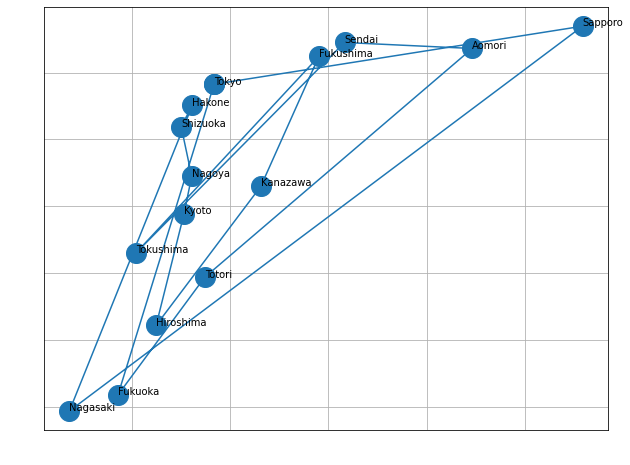

In [253]:
# plt.style.use('_mpl-gallery')

# make data
Xpoints = []
Ypoints = []
Labels = []

for city in cityList:
    Xpoints.append(city.x)
    Ypoints.append(city.y)
    Labels.append(city.name)

x = Xpoints
y = Ypoints

# plot
fig= plt.figure()
ax = fig.add_subplot()

plt.plot(x, y, marker=".",markersize=40)

ax.scatter(x,y)
for i in range(0, 15):
    ax.annotate(Labels[i], (x[i], y[i]))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.xaxis.label.set_color('white')        
ax.yaxis.label.set_color('white')    

fig.set_figheight(6)
fig.set_figwidth(8)
ax.tick_params(axis='x', colors='white') 
ax.tick_params(axis='y', colors='white') 

plt.show()